# Étude de données EM-DAT — Catastrophes en Algérie (1900–2025)
## UE ACT1003E — Licence 3 Math, parcours Actuariat
## AKATCHI KANGA DANIEL — Année 2024–2025

1) Chargement des bibliothèques et des fichiers Excel

In [4]:
library(readxl)     # Lecture de fichiers Excel
library(dplyr)      # Manipulation de données
library(ggplot2)    # Graphiques
library(tidyr)      # Traitement de données manquantes
library(lubridate)  # Gestion des dates

Nous utilisons ici le package `readxl` pour lire les fichiers Excel, notamment la fonction `read_excel()`.  
L’argument `sheet` accepte soit un numéro (1, 2…), soit le nom de la feuille ("Feuille1"…).  
La fonction `excel_sheets()` permet de lister les feuilles présentes.  
L’argument `col_names` vaut `TRUE` par défaut : la première ligne est considérée comme contenant les noms de colonnes.

In [6]:
getwd()


[1] "C:/Users/LENOVO"

In [7]:
# Liste des feuilles disponibles
excel_sheets("C:/Users/LENOVO/Documents/emdat_2025-ALG.xlsx")

# Chargement des données (Jeu 1)
pays1 <- read_excel("C:/Users/LENOVO/Documents/emdat_2025-ALG.xlsx", sheet = 1)

# Aperçu rapide
head(pays1)

[1] "EM-DAT Data" "EM-DAT Info"

DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
1910-0005-DZA,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NA,NA,DZA,...,NA,NA,NA,NA,NA,NA,3.058105,NA,2003-07-01,2023-09-25
1927-0012-DZA,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NA,NA,DZA,...,NA,NA,NA,NA,NA,NA,5.709622,NA,2008-03-14,2023-09-25
1937-0009-DZA,Yes,tec-tra-air-air,Technological,Transport,Air,Air,NA,Sabca S-73,DZA,...,NA,NA,NA,NA,NA,NA,4.725204,NA,2005-04-13,2023-09-25
1942-0033-DZA,Yes,tec-tra-air-air,Technological,Transport,Air,Air,NA,Dewoitine D-342,DZA,...,NA,NA,NA,NA,NA,NA,5.348669,NA,2003-07-01,2023-09-25
1946-0001-DZA,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NA,NA,DZA,...,NA,NA,NA,NA,NA,NA,6.398714,NA,2004-04-20,2023-09-25
1952-0026-DZA,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NA,NA,DZA,...,NA,NA,NA,NA,NA,NA,8.728503,NA,2003-07-01,2023-09-25


2. Statistiques de base et détections des données manquantes

In [8]:
# Dimensions du jeu
cat(sprintf("Nombre de lignes : %d\n", nrow(pays1)))
cat(sprintf("Nombre de colonnes : %d\n", ncol(pays1)))

# Données manquantes
nb_na <- colSums(is.na(pays1))
vars_na <- sum(nb_na > 0)
cat(sprintf("Il y a %d variables comportant des données manquantes\n", vars_na))

# Liste détaillée
nb_na[nb_na > 0]

# Vérification du pays
unique(pays1$Country)

Nombre de lignes : 153
Nombre de colonnes : 46
Il y a 26 variables comportant des données manquantes


External IDs 
                                      135 
                               Event Name 
                                      132 
                                 Location 
                                        3 
                                   Origin 
                                      119 
                         Associated Types 
                                      134 
              AID Contribution ('000 US$) 
                                      146 
                                Magnitude 
                                      113 
                          Magnitude Scale 
                                       67 
                                 Latitude 
                                      124 
                                Longitude 
                                      124 
                              River Basin 
                                      145 
                                Start Day 
                                       17 
                                  End Day 
                                       16 
                             Total Deaths 
                                       16 
                              No. Injured 
                                       66 
                             No. Affected 
                                      109 
                             No. Homeless 
                                      132 
                           Total Affected 
                                       36 
          Reconstruction Costs ('000 US$) 
                                      153 
Reconstruction Costs, Adjusted ('000 US$) 
                                      153 
                Insured Damage ('000 US$) 
                                      153 
      Insured Damage, Adjusted ('000 US$) 
                                      153 
                  Total Damage ('000 US$) 
                                      131 
        Total Damage, Adjusted ('000 US$) 
                                      131 
                                      CPI 
                                        3 
                              Admin Units 
                                      107

[1] "Algeria"

3. Catastrophes naturelles vs Technologiques par année

               
                1910 1927 1937 1942 1946 1952 1954 1959 1960 1963 1964 1965
  Natural          1    1    0    0    1    1    1    0    1    1    0    1
  Technological    0    0    1    1    0    0    0    1    0    0    1    0
               
                1966 1967 1969 1973 1974 1979 1980 1981 1982 1984 1985 1987
  Natural          1    2    1    1    1    1    1    1    1    1    2    2
  Technological    0    0    0    0    0    0    0    0    2    0    0    1
               
                1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1999 2000
  Natural          3    1    0    1    2    2    4    0    1    2    2    1
  Technological    0    1    1    0    1    0    1    1    1    0    1    1
               
                2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
  Natural          1    2    7    4    3    2    7    1    2    0    1    2
  Technological    0    6    5    5    2    2    0    2    4    2    0    1
               
        

Saving 6.67 x 6.67 in image


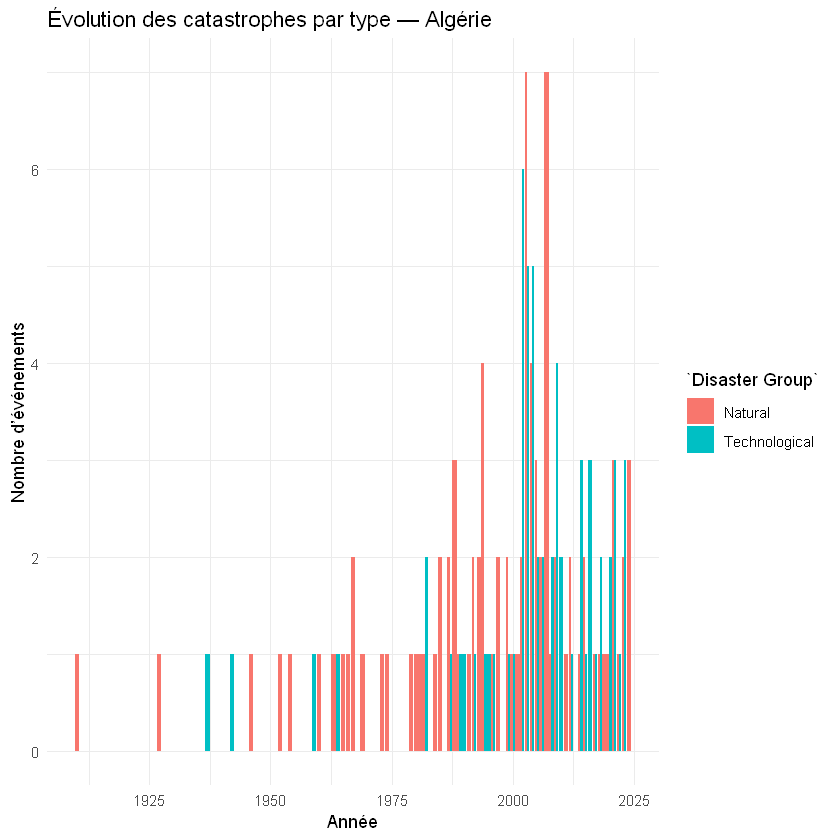

In [10]:
# Table de contingence
table(pays1$`Disaster Group`, pays1$`Start Year`)

# Filtrage des groupes
df_grp <- pays1 %>%
  group_by(`Disaster Group`, `Start Year`) %>%
  summarise(nb = n()) %>%
  filter(!is.na(`Start Year`))



# Graphiques séparés
ggplot(df_grp, aes(x = `Start Year`, y = nb, fill = `Disaster Group`)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Évolution des catastrophes par type — Algérie", x = "Année", y = "Nombre d’événements") +
  theme_minimal()

ggsave("EvolCat_Algerie_Daniel.pdf")


In [11]:
# vérifions que le fichier PDF a bien été crée:
list.files(pattern="pdf$")



[1] "EvolCat_Algerie_Daniel.pdf"

4.  Les catastrophes naturelles (sous-groupes et types)


    Biological Climatological    Geophysical   Hydrological Meteorological 
             5              5             21             53              6 

Saving 6.67 x 6.67 in image


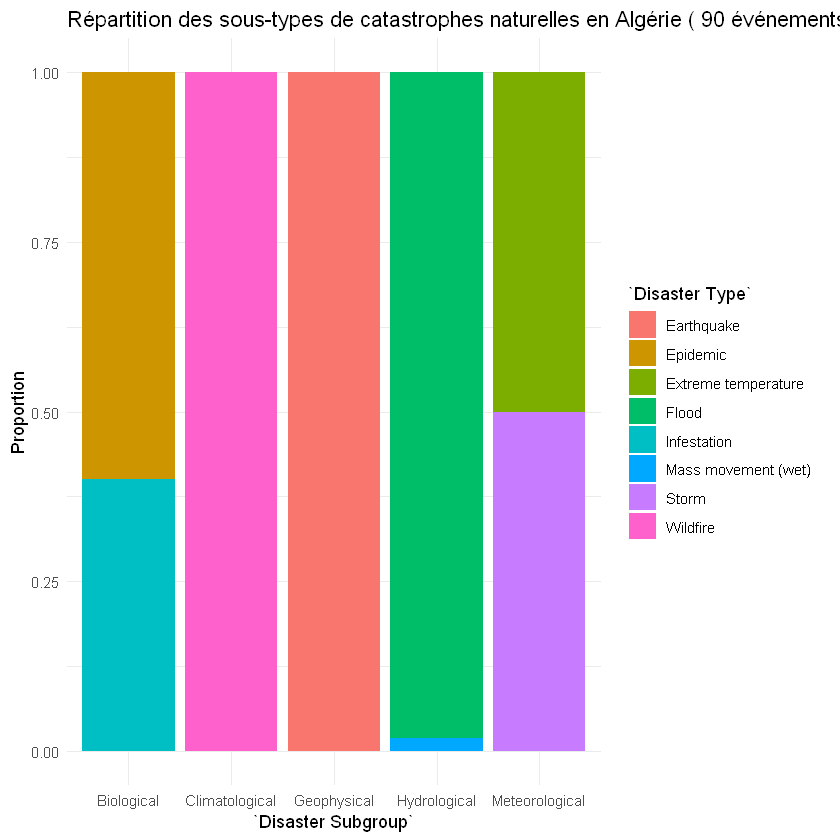

In [12]:
cat_nat <- pays1 %>% filter(`Disaster Group` == "Natural")

# Proportions des sous-groupes
table(cat_nat$`Disaster Subgroup`)

# Graphiques des types par sous-groupe
ggplot(cat_nat, aes(x = `Disaster Subgroup`, fill = `Disaster Type`)) +
  geom_bar(position = "fill") +
  labs(title = paste("Répartition des sous-types de catastrophes naturelles en Algérie (", nrow(cat_nat), "événements)"), y = "Proportion") +
  theme_minimal()

ggsave("FocusCatNat_Algerie_Daniel.pdf")

5. Calcul des dates, durées...

Nous construisons les colonnes epochDeb, dayDeb, epochFin, dayFin et duree à partir des dates de début et de fin (année, mois, jour). Les dates sont formatées explicitement en chaîne "AAAA-MM-JJ" pour être comprises par R. La variable duree représente la durée d’un événement en jours.

In [14]:
pays1 <- pays1 %>%
  mutate(
    # Création de la date de début en chaîne formatée "YYYY-MM-DD"
    date_deb_str = ifelse(
      is.na(`Start Year`) | is.na(`Start Month`) | is.na(`Start Day`),
      NA,
      sprintf("%04d-%02d-%02d", as.integer(`Start Year`), as.integer(`Start Month`), as.integer(`Start Day`))
    ),
    
    # Conversion en POSIXct
    epochDeb = as.numeric(as.POSIXct(date_deb_str, tz = "UTC")),
    
    # Idem pour la date de fin
    date_fin_str = ifelse(
      is.na(`End Year`) | is.na(`End Month`) | is.na(`End Day`),
      NA,
      sprintf("%04d-%02d-%02d", as.integer(`End Year`), as.integer(`End Month`), as.integer(`End Day`))
    ),
    
    epochFin = as.numeric(as.POSIXct(date_fin_str, tz = "UTC")),
    
    # Calcul des jours depuis 1970
    dayDeb = ifelse(!is.na(epochDeb), round(epochDeb / (60 * 60 * 24)), NA),
    dayFin = ifelse(!is.na(epochFin), round(epochFin / (60 * 60 * 24)), NA),
    
    # Durée en jours
    duree = ifelse(!is.na(dayDeb) & !is.na(dayFin), dayFin - dayDeb, NA)
  )

On exporte maintenant le fichier complété:

In [16]:
write.csv(pays1, "export1_Algerie_Daniel.csv", row.names = FALSE)

Explication:

write.csv() : c’est une fonction R qui enregistre (exporte) un tableau de données (data frame) au format CSV (Comma Separated Values).
"export1_Algerie_Daniel.csv" : c’est le nom du fichier dans lequel les données seront enregistrées.
row.names = FALSE : signifie ne pas inclure les numéros de lignes dans le fichier CSV
Cette commande crée un fichier .csv dans le répertoire courant (celui donné par getwd()), qui contient :

Toutes les colonnes de pays1, y compris celles calculées à la question 5 :

epochDeb, epochFin, dayDeb, dayFin, duree...

6. Analyse des durées (boîtes à moustaches)

Nous représentons ci-dessous la répartition des durées (en jours) des catastrophes naturelles, calculée à partir des dates de début et de fin. Les événements avec des durées manquantes ont été exclus du graphique.

Saving 6.67 x 6.67 in image


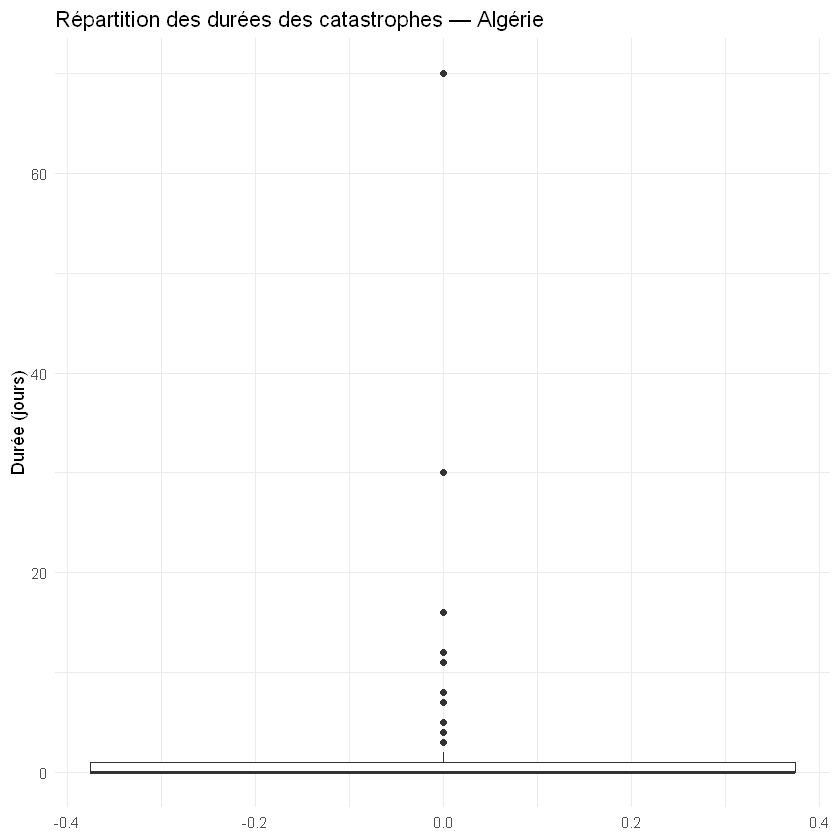

In [18]:
ggplot(filter(pays1, !is.na(duree)), aes(y = duree)) +
  geom_boxplot() +
  labs(title = "Répartition des durées des catastrophes — Algérie", y = "Durée (jours)") +
  theme_minimal()

ggsave("DureesCatNat_Algerie_Daniel.pdf")

7. Identification des séquences d’événements liés dans un délai de 1 jour

Deux événements sont considérés comme liés si le second commence pendant le premier ou dans un délai d’un jour après la fin du premier. 
Une relation transitive est appliquée pour regrouper les événements en séquences : si A est lié à B et B à C, alors A, B et C sont dans la même séquence.
Le but est d’identifier et numéroter ces séquences.


On va assigner un identifiant unique à chaque ligne dès le départ.



In [20]:
pays1$id <- seq_len(nrow(pays1))  # Ajoute une colonne id = 1, 2, ..., n

In [21]:
# Étape 1 : ajouter un identifiant unique à pays1
pays1$id <- seq_len(nrow(pays1))

# Étape 2 : extraire les événements valides avec dates
valid_events <- pays1 %>%
  filter(!is.na(dayDeb) & !is.na(dayFin)) %>%
  arrange(dayDeb)

# Initialisation
valid_events$sequence <- NA_integer_
seq_id <- 1

for (i in 1:nrow(valid_events)) {
  if (!is.na(valid_events$sequence[i])) next
  
  to_explore <- valid_events$id[i]
  valid_events$sequence[i] <- seq_id
  
  while (length(to_explore) > 0) {
    current_id <- to_explore[1]
    current_event <- valid_events[valid_events$id == current_id, ]
    to_explore <- to_explore[-1]
    
    related <- valid_events %>%
      filter(is.na(sequence),
             dayDeb <= current_event$dayFin + 1,
             dayDeb >= current_event$dayDeb)
    
    valid_events$sequence[valid_events$id %in% related$id] <- seq_id
    to_explore <- c(to_explore, related$id)
  }
  
  seq_id <- seq_id + 1
}

# Étape 3 : Réintégration dans pays1
pays1 <- left_join(pays1, valid_events[, c("id", "sequence")], by = "id")

# Nombre de séquences
cat(sprintf("Nombre total de séquences détectées : %d\n", max(valid_events$sequence, na.rm = TRUE)))


Nombre total de séquences détectées : 133


Explication: Nous identifions les séquences de catastrophes liées selon le critère suivant :
si un événement commence pendant un autre ou dans un délai de 1 jour après sa fin, ils appartiennent à la même séquence.
La relation est transitive.On a identifié `r max(valid_events$sequence, na.rm = TRUE)` séquences distinctes.


8. Comparaison entre les deux pays

## Traitement des données pour le Chili


Nous reproduisons ici les mêmes étapes que pour l’Algérie, appliquées au second fichier de données (`emdat_2025-CHI.xlsx`).
L’objectif est de comparer les profils de catastrophes des deux pays à travers des statistiques descriptives et des visualisations :
types d’événements, évolution dans le temps, durées, etc. Nous utilisons à nouveau les packages `readxl`, `dplyr`, `ggplot2`, et `lubridate`, et créons les variables utiles pour l'analyse : `duree`, `epochDeb`, `epochFin`, etc. Les fichiers de sortie (.csv) sont nommés  pour identifier clairement le pays.

Saving 6.67 x 6.67 in image


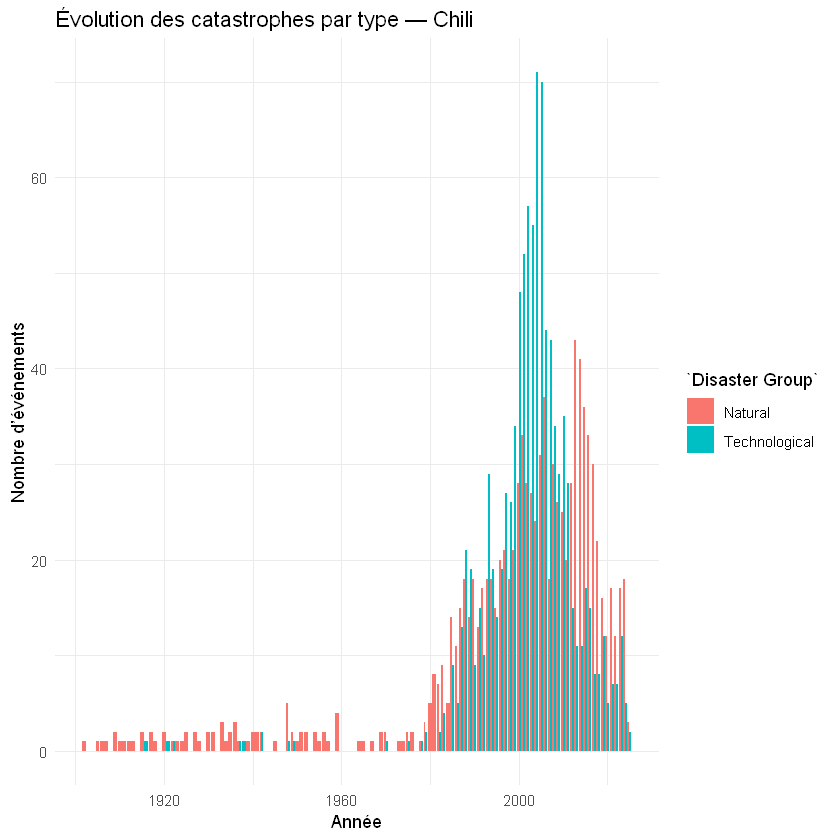

In [22]:
# Chargement des données Chili
pays2 <- read_excel("C:/Users/LENOVO/Downloads/emdat_2025-CHI.xlsx", sheet = 1)

# Ajout d'un identifiant unique
pays2$id <- seq_len(nrow(pays2))

# Nettoyage et dates
pays2 <- pays2 %>%
  mutate(
    date_deb_str = ifelse(is.na(`Start Year`) | is.na(`Start Month`) | is.na(`Start Day`),
                          NA,
                          sprintf("%04d-%02d-%02d", as.integer(`Start Year`), as.integer(`Start Month`), as.integer(`Start Day`))),
    epochDeb = as.numeric(as.POSIXct(date_deb_str, tz = "UTC")),
    date_fin_str = ifelse(is.na(`End Year`) | is.na(`End Month`) | is.na(`End Day`),
                          NA,
                          sprintf("%04d-%02d-%02d", as.integer(`End Year`), as.integer(`End Month`), as.integer(`End Day`))),
    epochFin = as.numeric(as.POSIXct(date_fin_str, tz = "UTC")),
    dayDeb = ifelse(!is.na(epochDeb), round(epochDeb / (60 * 60 * 24)), NA),
    dayFin = ifelse(!is.na(epochFin), round(epochFin / (60 * 60 * 24)), NA),
    duree = ifelse(!is.na(dayDeb) & !is.na(dayFin), dayFin - dayDeb, NA)
  )

# Graphique 1 — Évolution des catastrophes
df_grp2 <- pays2 %>%
  group_by(`Disaster Group`, `Start Year`) %>%
  summarise(nb = n()) %>%
  filter(!is.na(`Start Year`))

ggplot(df_grp2, aes(x = `Start Year`, y = nb, fill = `Disaster Group`)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Évolution des catastrophes par type — Chili", x = "Année", y = "Nombre d’événements") +
  theme_minimal()

ggsave("EvolCat_Chili_Daniel.pdf")

Saving 6.67 x 6.67 in image


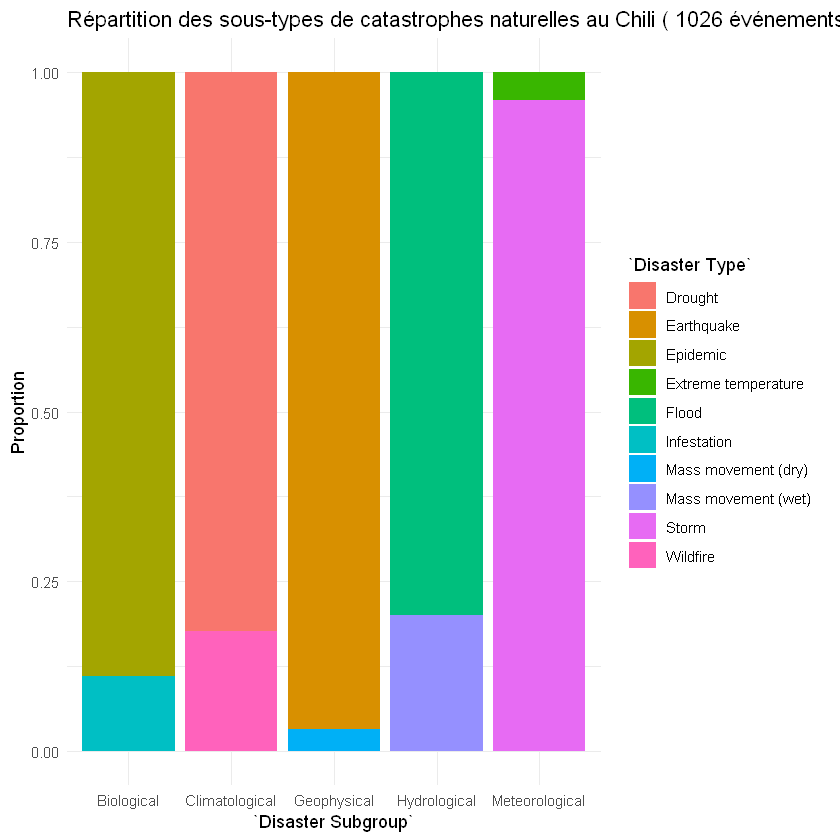

In [23]:
# Graphique 2 — Types naturels
cat_nat2 <- pays2 %>% filter(`Disaster Group` == "Natural")

ggplot(cat_nat2, aes(x = `Disaster Subgroup`, fill = `Disaster Type`)) +
  geom_bar(position = "fill") +
  labs(title = paste("Répartition des sous-types de catastrophes naturelles au Chili (", nrow(cat_nat2), "événements)"),
       y = "Proportion") +
  theme_minimal()

ggsave("FocusCatNat_Chili_Daniel.pdf")

Saving 6.67 x 6.67 in image


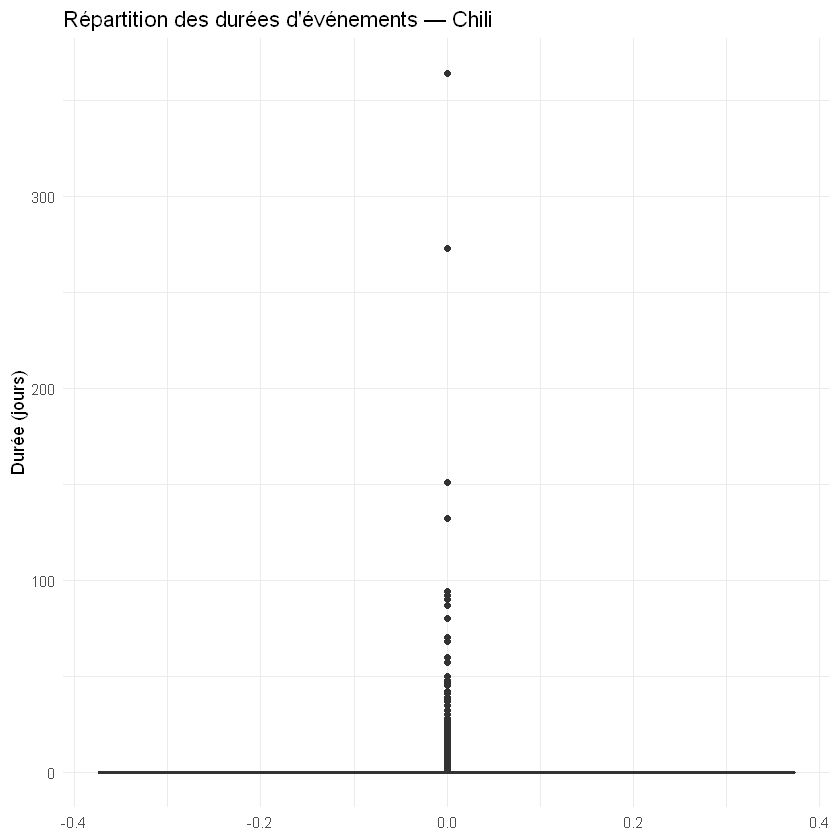

In [24]:
# Graphique 3 — Durées
ggplot(filter(pays2, !is.na(duree)), aes(y = duree)) +
  geom_boxplot() +
  labs(title = "Répartition des durées d'événements — Chili", y = "Durée (jours)") +
  theme_minimal()

ggsave("DureesCatNat_Chili_Daniel.pdf")

In [25]:
# Export du fichier avec les colonnes supplémentaires
write.csv(pays2, "export1_Chili_Daniel.csv", row.names = FALSE)

Les traitements appliqués au Chili permettent d'obtenir des résultats directement comparables à ceux de l’Algérie. Les mêmes variables (`duree`, `epochDeb`, etc.) ont été créées, les mêmes graphiques exportés et les mêmes formats de fichiers générés.
Cela facilitera la comparaison dans la dernière question.

L’analyse comparative montre des différences :

- L’Algérie est touchée surtout par des sécheresses et inondations.
- Le Chili subit majoritairement des séismes.
- Les catastrophes en Algérie sont souvent longues. exemple: sécheresse. Celles du Chili plus courtes mais fréquentes.
- Le nombre de **séquences liées** est plus élevé au Chili, indiquant des périodes plus concentrées dans le temps.

D'où l’influence du contexte géographique et climatique sur les profils de risques.
